In [363]:
# Input data

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader

import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np


t_celsius = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_unknown = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
# t_celsius = [0,1,2,3,4,5]
# t_unknown = [0,3,5,9,13,17]
t_celsius = torch.tensor(t_celsius)
t_unknown = torch.tensor(t_unknown)

In [364]:
# First try
def model(t_unknown, w, b):
    return w * t_unknown + b

In [365]:
# Loss function
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
#     print(squared_diffs.mean())
    return squared_diffs.mean()

In [366]:
# Initilize weights and bias
w = torch.ones(())
b = torch.zeros(())

# t_predicted = model(t_u, w, b)


In [367]:
# Derivative of the loss to w
def dloss_fn(t_p, t_c):
    dsq_diffs = 2 * (t_p - t_c) / t_p.size(0)
    return dsq_diffs

In [368]:
# Derivative of the model to w
def dmodel_dw(t_unknown, w, b):
    return t_unknown


# Derivative of the model to b
def dmodel_db(t_unknown, w, b):
    return 1.0

In [195]:
# In[14]:
def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])

In [196]:
# In[15]:
def training_loop(n_epochs, learning_rate, params, t_unknown, t_celsius):
    for epoch in range(1, n_epochs + 1):
        w, b = params

        t_predicted = model(t_unknown, w, b)
        loss = loss_fn(t_predicted, t_celsius)
        grad = grad_fn(t_unknown, t_celsius, t_predicted, w, b)
        params = params - learning_rate * grad

        print('Epoch %d, Loss %f' % (epoch, float(loss)))

    return params

In [197]:
# In[17]:
t_un = 0.1 * t_unknown
params = training_loop(
    n_epochs = 5000,
    learning_rate = 1e-2,
    params = torch.tensor([1.0, 0.0]),
    t_unknown = t_un,
    t_celsius = t_celsius)

Epoch 1, Loss 80.364342
Epoch 2, Loss 37.574917
Epoch 3, Loss 30.871077
Epoch 4, Loss 29.756193
Epoch 5, Loss 29.507149
Epoch 6, Loss 29.392458
Epoch 7, Loss 29.298828
Epoch 8, Loss 29.208717
Epoch 9, Loss 29.119417
Epoch 10, Loss 29.030487
Epoch 11, Loss 28.941875
Epoch 12, Loss 28.853565
Epoch 13, Loss 28.765556
Epoch 14, Loss 28.677851
Epoch 15, Loss 28.590431
Epoch 16, Loss 28.503321
Epoch 17, Loss 28.416496
Epoch 18, Loss 28.329975
Epoch 19, Loss 28.243738
Epoch 20, Loss 28.157801
Epoch 21, Loss 28.072151
Epoch 22, Loss 27.986799
Epoch 23, Loss 27.901731
Epoch 24, Loss 27.816954
Epoch 25, Loss 27.732460
Epoch 26, Loss 27.648256
Epoch 27, Loss 27.564342
Epoch 28, Loss 27.480711
Epoch 29, Loss 27.397358
Epoch 30, Loss 27.314295
Epoch 31, Loss 27.231512
Epoch 32, Loss 27.149006
Epoch 33, Loss 27.066790
Epoch 34, Loss 26.984844
Epoch 35, Loss 26.903173
Epoch 36, Loss 26.821791
Epoch 37, Loss 26.740675
Epoch 38, Loss 26.659838
Epoch 39, Loss 26.579279
Epoch 40, Loss 26.498987
Epoch 41,

Epoch 453, Loss 8.714911
Epoch 454, Loss 8.695266
Epoch 455, Loss 8.675689
Epoch 456, Loss 8.656174
Epoch 457, Loss 8.636728
Epoch 458, Loss 8.617346
Epoch 459, Loss 8.598029
Epoch 460, Loss 8.578781
Epoch 461, Loss 8.559597
Epoch 462, Loss 8.540478
Epoch 463, Loss 8.521426
Epoch 464, Loss 8.502438
Epoch 465, Loss 8.483516
Epoch 466, Loss 8.464652
Epoch 467, Loss 8.445858
Epoch 468, Loss 8.427128
Epoch 469, Loss 8.408456
Epoch 470, Loss 8.389848
Epoch 471, Loss 8.371305
Epoch 472, Loss 8.352828
Epoch 473, Loss 8.334408
Epoch 474, Loss 8.316055
Epoch 475, Loss 8.297764
Epoch 476, Loss 8.279534
Epoch 477, Loss 8.261369
Epoch 478, Loss 8.243261
Epoch 479, Loss 8.225213
Epoch 480, Loss 8.207232
Epoch 481, Loss 8.189310
Epoch 482, Loss 8.171450
Epoch 483, Loss 8.153646
Epoch 484, Loss 8.135907
Epoch 485, Loss 8.118226
Epoch 486, Loss 8.100607
Epoch 487, Loss 8.083045
Epoch 488, Loss 8.065548
Epoch 489, Loss 8.048104
Epoch 490, Loss 8.030723
Epoch 491, Loss 8.013400
Epoch 492, Loss 7.996135


Epoch 838, Loss 4.490474
Epoch 839, Loss 4.485170
Epoch 840, Loss 4.479884
Epoch 841, Loss 4.474614
Epoch 842, Loss 4.469364
Epoch 843, Loss 4.464129
Epoch 844, Loss 4.458913
Epoch 845, Loss 4.453716
Epoch 846, Loss 4.448534
Epoch 847, Loss 4.443372
Epoch 848, Loss 4.438227
Epoch 849, Loss 4.433099
Epoch 850, Loss 4.427989
Epoch 851, Loss 4.422897
Epoch 852, Loss 4.417819
Epoch 853, Loss 4.412762
Epoch 854, Loss 4.407720
Epoch 855, Loss 4.402697
Epoch 856, Loss 4.397688
Epoch 857, Loss 4.392697
Epoch 858, Loss 4.387725
Epoch 859, Loss 4.382769
Epoch 860, Loss 4.377828
Epoch 861, Loss 4.372905
Epoch 862, Loss 4.368000
Epoch 863, Loss 4.363111
Epoch 864, Loss 4.358238
Epoch 865, Loss 4.353383
Epoch 866, Loss 4.348542
Epoch 867, Loss 4.343716
Epoch 868, Loss 4.338911
Epoch 869, Loss 4.334121
Epoch 870, Loss 4.329345
Epoch 871, Loss 4.324588
Epoch 872, Loss 4.319845
Epoch 873, Loss 4.315118
Epoch 874, Loss 4.310409
Epoch 875, Loss 4.305714
Epoch 876, Loss 4.301035
Epoch 877, Loss 4.296376


Epoch 1164, Loss 3.443449
Epoch 1165, Loss 3.441696
Epoch 1166, Loss 3.439952
Epoch 1167, Loss 3.438210
Epoch 1168, Loss 3.436478
Epoch 1169, Loss 3.434753
Epoch 1170, Loss 3.433029
Epoch 1171, Loss 3.431314
Epoch 1172, Loss 3.429608
Epoch 1173, Loss 3.427903
Epoch 1174, Loss 3.426204
Epoch 1175, Loss 3.424509
Epoch 1176, Loss 3.422824
Epoch 1177, Loss 3.421144
Epoch 1178, Loss 3.419468
Epoch 1179, Loss 3.417798
Epoch 1180, Loss 3.416134
Epoch 1181, Loss 3.414477
Epoch 1182, Loss 3.412824
Epoch 1183, Loss 3.411176
Epoch 1184, Loss 3.409534
Epoch 1185, Loss 3.407899
Epoch 1186, Loss 3.406272
Epoch 1187, Loss 3.404645
Epoch 1188, Loss 3.403024
Epoch 1189, Loss 3.401413
Epoch 1190, Loss 3.399802
Epoch 1191, Loss 3.398200
Epoch 1192, Loss 3.396602
Epoch 1193, Loss 3.395011
Epoch 1194, Loss 3.393425
Epoch 1195, Loss 3.391845
Epoch 1196, Loss 3.390267
Epoch 1197, Loss 3.388697
Epoch 1198, Loss 3.387132
Epoch 1199, Loss 3.385571
Epoch 1200, Loss 3.384017
Epoch 1201, Loss 3.382467
Epoch 1202, 

Epoch 1534, Loss 3.074227
Epoch 1535, Loss 3.073726
Epoch 1536, Loss 3.073232
Epoch 1537, Loss 3.072739
Epoch 1538, Loss 3.072245
Epoch 1539, Loss 3.071753
Epoch 1540, Loss 3.071265
Epoch 1541, Loss 3.070778
Epoch 1542, Loss 3.070293
Epoch 1543, Loss 3.069808
Epoch 1544, Loss 3.069326
Epoch 1545, Loss 3.068845
Epoch 1546, Loss 3.068366
Epoch 1547, Loss 3.067887
Epoch 1548, Loss 3.067412
Epoch 1549, Loss 3.066937
Epoch 1550, Loss 3.066464
Epoch 1551, Loss 3.065993
Epoch 1552, Loss 3.065524
Epoch 1553, Loss 3.065055
Epoch 1554, Loss 3.064588
Epoch 1555, Loss 3.064123
Epoch 1556, Loss 3.063660
Epoch 1557, Loss 3.063199
Epoch 1558, Loss 3.062738
Epoch 1559, Loss 3.062280
Epoch 1560, Loss 3.061822
Epoch 1561, Loss 3.061368
Epoch 1562, Loss 3.060913
Epoch 1563, Loss 3.060461
Epoch 1564, Loss 3.060011
Epoch 1565, Loss 3.059561
Epoch 1566, Loss 3.059114
Epoch 1567, Loss 3.058668
Epoch 1568, Loss 3.058221
Epoch 1569, Loss 3.057780
Epoch 1570, Loss 3.057338
Epoch 1571, Loss 3.056898
Epoch 1572, 

Epoch 1913, Loss 2.968046
Epoch 1914, Loss 2.967908
Epoch 1915, Loss 2.967772
Epoch 1916, Loss 2.967636
Epoch 1917, Loss 2.967499
Epoch 1918, Loss 2.967365
Epoch 1919, Loss 2.967230
Epoch 1920, Loss 2.967095
Epoch 1921, Loss 2.966961
Epoch 1922, Loss 2.966827
Epoch 1923, Loss 2.966693
Epoch 1924, Loss 2.966561
Epoch 1925, Loss 2.966429
Epoch 1926, Loss 2.966297
Epoch 1927, Loss 2.966167
Epoch 1928, Loss 2.966036
Epoch 1929, Loss 2.965904
Epoch 1930, Loss 2.965776
Epoch 1931, Loss 2.965646
Epoch 1932, Loss 2.965517
Epoch 1933, Loss 2.965387
Epoch 1934, Loss 2.965261
Epoch 1935, Loss 2.965131
Epoch 1936, Loss 2.965005
Epoch 1937, Loss 2.964878
Epoch 1938, Loss 2.964751
Epoch 1939, Loss 2.964625
Epoch 1940, Loss 2.964500
Epoch 1941, Loss 2.964375
Epoch 1942, Loss 2.964250
Epoch 1943, Loss 2.964126
Epoch 1944, Loss 2.964001
Epoch 1945, Loss 2.963879
Epoch 1946, Loss 2.963756
Epoch 1947, Loss 2.963632
Epoch 1948, Loss 2.963511
Epoch 1949, Loss 2.963388
Epoch 1950, Loss 2.963266
Epoch 1951, 

Epoch 2525, Loss 2.932689
Epoch 2526, Loss 2.932671
Epoch 2527, Loss 2.932654
Epoch 2528, Loss 2.932637
Epoch 2529, Loss 2.932619
Epoch 2530, Loss 2.932603
Epoch 2531, Loss 2.932585
Epoch 2532, Loss 2.932569
Epoch 2533, Loss 2.932553
Epoch 2534, Loss 2.932535
Epoch 2535, Loss 2.932520
Epoch 2536, Loss 2.932502
Epoch 2537, Loss 2.932487
Epoch 2538, Loss 2.932469
Epoch 2539, Loss 2.932455
Epoch 2540, Loss 2.932438
Epoch 2541, Loss 2.932421
Epoch 2542, Loss 2.932404
Epoch 2543, Loss 2.932387
Epoch 2544, Loss 2.932370
Epoch 2545, Loss 2.932358
Epoch 2546, Loss 2.932340
Epoch 2547, Loss 2.932324
Epoch 2548, Loss 2.932310
Epoch 2549, Loss 2.932293
Epoch 2550, Loss 2.932278
Epoch 2551, Loss 2.932261
Epoch 2552, Loss 2.932246
Epoch 2553, Loss 2.932229
Epoch 2554, Loss 2.932215
Epoch 2555, Loss 2.932198
Epoch 2556, Loss 2.932184
Epoch 2557, Loss 2.932168
Epoch 2558, Loss 2.932153
Epoch 2559, Loss 2.932137
Epoch 2560, Loss 2.932122
Epoch 2561, Loss 2.932107
Epoch 2562, Loss 2.932092
Epoch 2563, 

Epoch 2861, Loss 2.929255
Epoch 2862, Loss 2.929250
Epoch 2863, Loss 2.929244
Epoch 2864, Loss 2.929238
Epoch 2865, Loss 2.929234
Epoch 2866, Loss 2.929228
Epoch 2867, Loss 2.929222
Epoch 2868, Loss 2.929217
Epoch 2869, Loss 2.929211
Epoch 2870, Loss 2.929207
Epoch 2871, Loss 2.929201
Epoch 2872, Loss 2.929195
Epoch 2873, Loss 2.929191
Epoch 2874, Loss 2.929185
Epoch 2875, Loss 2.929181
Epoch 2876, Loss 2.929175
Epoch 2877, Loss 2.929170
Epoch 2878, Loss 2.929165
Epoch 2879, Loss 2.929160
Epoch 2880, Loss 2.929154
Epoch 2881, Loss 2.929148
Epoch 2882, Loss 2.929143
Epoch 2883, Loss 2.929140
Epoch 2884, Loss 2.929133
Epoch 2885, Loss 2.929128
Epoch 2886, Loss 2.929122
Epoch 2887, Loss 2.929119
Epoch 2888, Loss 2.929112
Epoch 2889, Loss 2.929108
Epoch 2890, Loss 2.929104
Epoch 2891, Loss 2.929099
Epoch 2892, Loss 2.929093
Epoch 2893, Loss 2.929088
Epoch 2894, Loss 2.929083
Epoch 2895, Loss 2.929080
Epoch 2896, Loss 2.929074
Epoch 2897, Loss 2.929069
Epoch 2898, Loss 2.929065
Epoch 2899, 

Epoch 3247, Loss 2.928079
Epoch 3248, Loss 2.928076
Epoch 3249, Loss 2.928076
Epoch 3250, Loss 2.928075
Epoch 3251, Loss 2.928072
Epoch 3252, Loss 2.928072
Epoch 3253, Loss 2.928071
Epoch 3254, Loss 2.928068
Epoch 3255, Loss 2.928068
Epoch 3256, Loss 2.928066
Epoch 3257, Loss 2.928065
Epoch 3258, Loss 2.928063
Epoch 3259, Loss 2.928061
Epoch 3260, Loss 2.928061
Epoch 3261, Loss 2.928057
Epoch 3262, Loss 2.928058
Epoch 3263, Loss 2.928056
Epoch 3264, Loss 2.928055
Epoch 3265, Loss 2.928052
Epoch 3266, Loss 2.928053
Epoch 3267, Loss 2.928051
Epoch 3268, Loss 2.928050
Epoch 3269, Loss 2.928047
Epoch 3270, Loss 2.928046
Epoch 3271, Loss 2.928046
Epoch 3272, Loss 2.928044
Epoch 3273, Loss 2.928042
Epoch 3274, Loss 2.928040
Epoch 3275, Loss 2.928040
Epoch 3276, Loss 2.928037
Epoch 3277, Loss 2.928036
Epoch 3278, Loss 2.928037
Epoch 3279, Loss 2.928034
Epoch 3280, Loss 2.928034
Epoch 3281, Loss 2.928031
Epoch 3282, Loss 2.928032
Epoch 3283, Loss 2.928029
Epoch 3284, Loss 2.928027
Epoch 3285, 

Epoch 3625, Loss 2.927766
Epoch 3626, Loss 2.927765
Epoch 3627, Loss 2.927766
Epoch 3628, Loss 2.927764
Epoch 3629, Loss 2.927764
Epoch 3630, Loss 2.927764
Epoch 3631, Loss 2.927762
Epoch 3632, Loss 2.927763
Epoch 3633, Loss 2.927763
Epoch 3634, Loss 2.927762
Epoch 3635, Loss 2.927761
Epoch 3636, Loss 2.927762
Epoch 3637, Loss 2.927759
Epoch 3638, Loss 2.927761
Epoch 3639, Loss 2.927761
Epoch 3640, Loss 2.927760
Epoch 3641, Loss 2.927759
Epoch 3642, Loss 2.927758
Epoch 3643, Loss 2.927759
Epoch 3644, Loss 2.927757
Epoch 3645, Loss 2.927758
Epoch 3646, Loss 2.927758
Epoch 3647, Loss 2.927757
Epoch 3648, Loss 2.927757
Epoch 3649, Loss 2.927756
Epoch 3650, Loss 2.927758
Epoch 3651, Loss 2.927756
Epoch 3652, Loss 2.927756
Epoch 3653, Loss 2.927755
Epoch 3654, Loss 2.927755
Epoch 3655, Loss 2.927754
Epoch 3656, Loss 2.927754
Epoch 3657, Loss 2.927755
Epoch 3658, Loss 2.927753
Epoch 3659, Loss 2.927752
Epoch 3660, Loss 2.927754
Epoch 3661, Loss 2.927752
Epoch 3662, Loss 2.927751
Epoch 3663, 

Epoch 4018, Loss 2.927677
Epoch 4019, Loss 2.927677
Epoch 4020, Loss 2.927678
Epoch 4021, Loss 2.927677
Epoch 4022, Loss 2.927677
Epoch 4023, Loss 2.927677
Epoch 4024, Loss 2.927677
Epoch 4025, Loss 2.927677
Epoch 4026, Loss 2.927676
Epoch 4027, Loss 2.927677
Epoch 4028, Loss 2.927675
Epoch 4029, Loss 2.927677
Epoch 4030, Loss 2.927674
Epoch 4031, Loss 2.927676
Epoch 4032, Loss 2.927675
Epoch 4033, Loss 2.927675
Epoch 4034, Loss 2.927676
Epoch 4035, Loss 2.927675
Epoch 4036, Loss 2.927674
Epoch 4037, Loss 2.927674
Epoch 4038, Loss 2.927677
Epoch 4039, Loss 2.927674
Epoch 4040, Loss 2.927676
Epoch 4041, Loss 2.927675
Epoch 4042, Loss 2.927675
Epoch 4043, Loss 2.927675
Epoch 4044, Loss 2.927674
Epoch 4045, Loss 2.927673
Epoch 4046, Loss 2.927675
Epoch 4047, Loss 2.927674
Epoch 4048, Loss 2.927674
Epoch 4049, Loss 2.927675
Epoch 4050, Loss 2.927673
Epoch 4051, Loss 2.927675
Epoch 4052, Loss 2.927675
Epoch 4053, Loss 2.927673
Epoch 4054, Loss 2.927673
Epoch 4055, Loss 2.927674
Epoch 4056, 

Epoch 4380, Loss 2.927654
Epoch 4381, Loss 2.927656
Epoch 4382, Loss 2.927655
Epoch 4383, Loss 2.927655
Epoch 4384, Loss 2.927655
Epoch 4385, Loss 2.927656
Epoch 4386, Loss 2.927656
Epoch 4387, Loss 2.927655
Epoch 4388, Loss 2.927654
Epoch 4389, Loss 2.927654
Epoch 4390, Loss 2.927654
Epoch 4391, Loss 2.927655
Epoch 4392, Loss 2.927656
Epoch 4393, Loss 2.927655
Epoch 4394, Loss 2.927656
Epoch 4395, Loss 2.927655
Epoch 4396, Loss 2.927654
Epoch 4397, Loss 2.927655
Epoch 4398, Loss 2.927655
Epoch 4399, Loss 2.927656
Epoch 4400, Loss 2.927654
Epoch 4401, Loss 2.927655
Epoch 4402, Loss 2.927654
Epoch 4403, Loss 2.927655
Epoch 4404, Loss 2.927655
Epoch 4405, Loss 2.927656
Epoch 4406, Loss 2.927655
Epoch 4407, Loss 2.927655
Epoch 4408, Loss 2.927654
Epoch 4409, Loss 2.927653
Epoch 4410, Loss 2.927655
Epoch 4411, Loss 2.927654
Epoch 4412, Loss 2.927654
Epoch 4413, Loss 2.927655
Epoch 4414, Loss 2.927655
Epoch 4415, Loss 2.927653
Epoch 4416, Loss 2.927654
Epoch 4417, Loss 2.927654
Epoch 4418, 

Epoch 4718, Loss 2.927648
Epoch 4719, Loss 2.927648
Epoch 4720, Loss 2.927649
Epoch 4721, Loss 2.927649
Epoch 4722, Loss 2.927649
Epoch 4723, Loss 2.927649
Epoch 4724, Loss 2.927648
Epoch 4725, Loss 2.927649
Epoch 4726, Loss 2.927650
Epoch 4727, Loss 2.927648
Epoch 4728, Loss 2.927648
Epoch 4729, Loss 2.927649
Epoch 4730, Loss 2.927649
Epoch 4731, Loss 2.927648
Epoch 4732, Loss 2.927649
Epoch 4733, Loss 2.927649
Epoch 4734, Loss 2.927649
Epoch 4735, Loss 2.927649
Epoch 4736, Loss 2.927650
Epoch 4737, Loss 2.927649
Epoch 4738, Loss 2.927650
Epoch 4739, Loss 2.927648
Epoch 4740, Loss 2.927649
Epoch 4741, Loss 2.927648
Epoch 4742, Loss 2.927648
Epoch 4743, Loss 2.927649
Epoch 4744, Loss 2.927649
Epoch 4745, Loss 2.927649
Epoch 4746, Loss 2.927648
Epoch 4747, Loss 2.927649
Epoch 4748, Loss 2.927648
Epoch 4749, Loss 2.927648
Epoch 4750, Loss 2.927650
Epoch 4751, Loss 2.927649
Epoch 4752, Loss 2.927648
Epoch 4753, Loss 2.927648
Epoch 4754, Loss 2.927648
Epoch 4755, Loss 2.927647
Epoch 4756, 

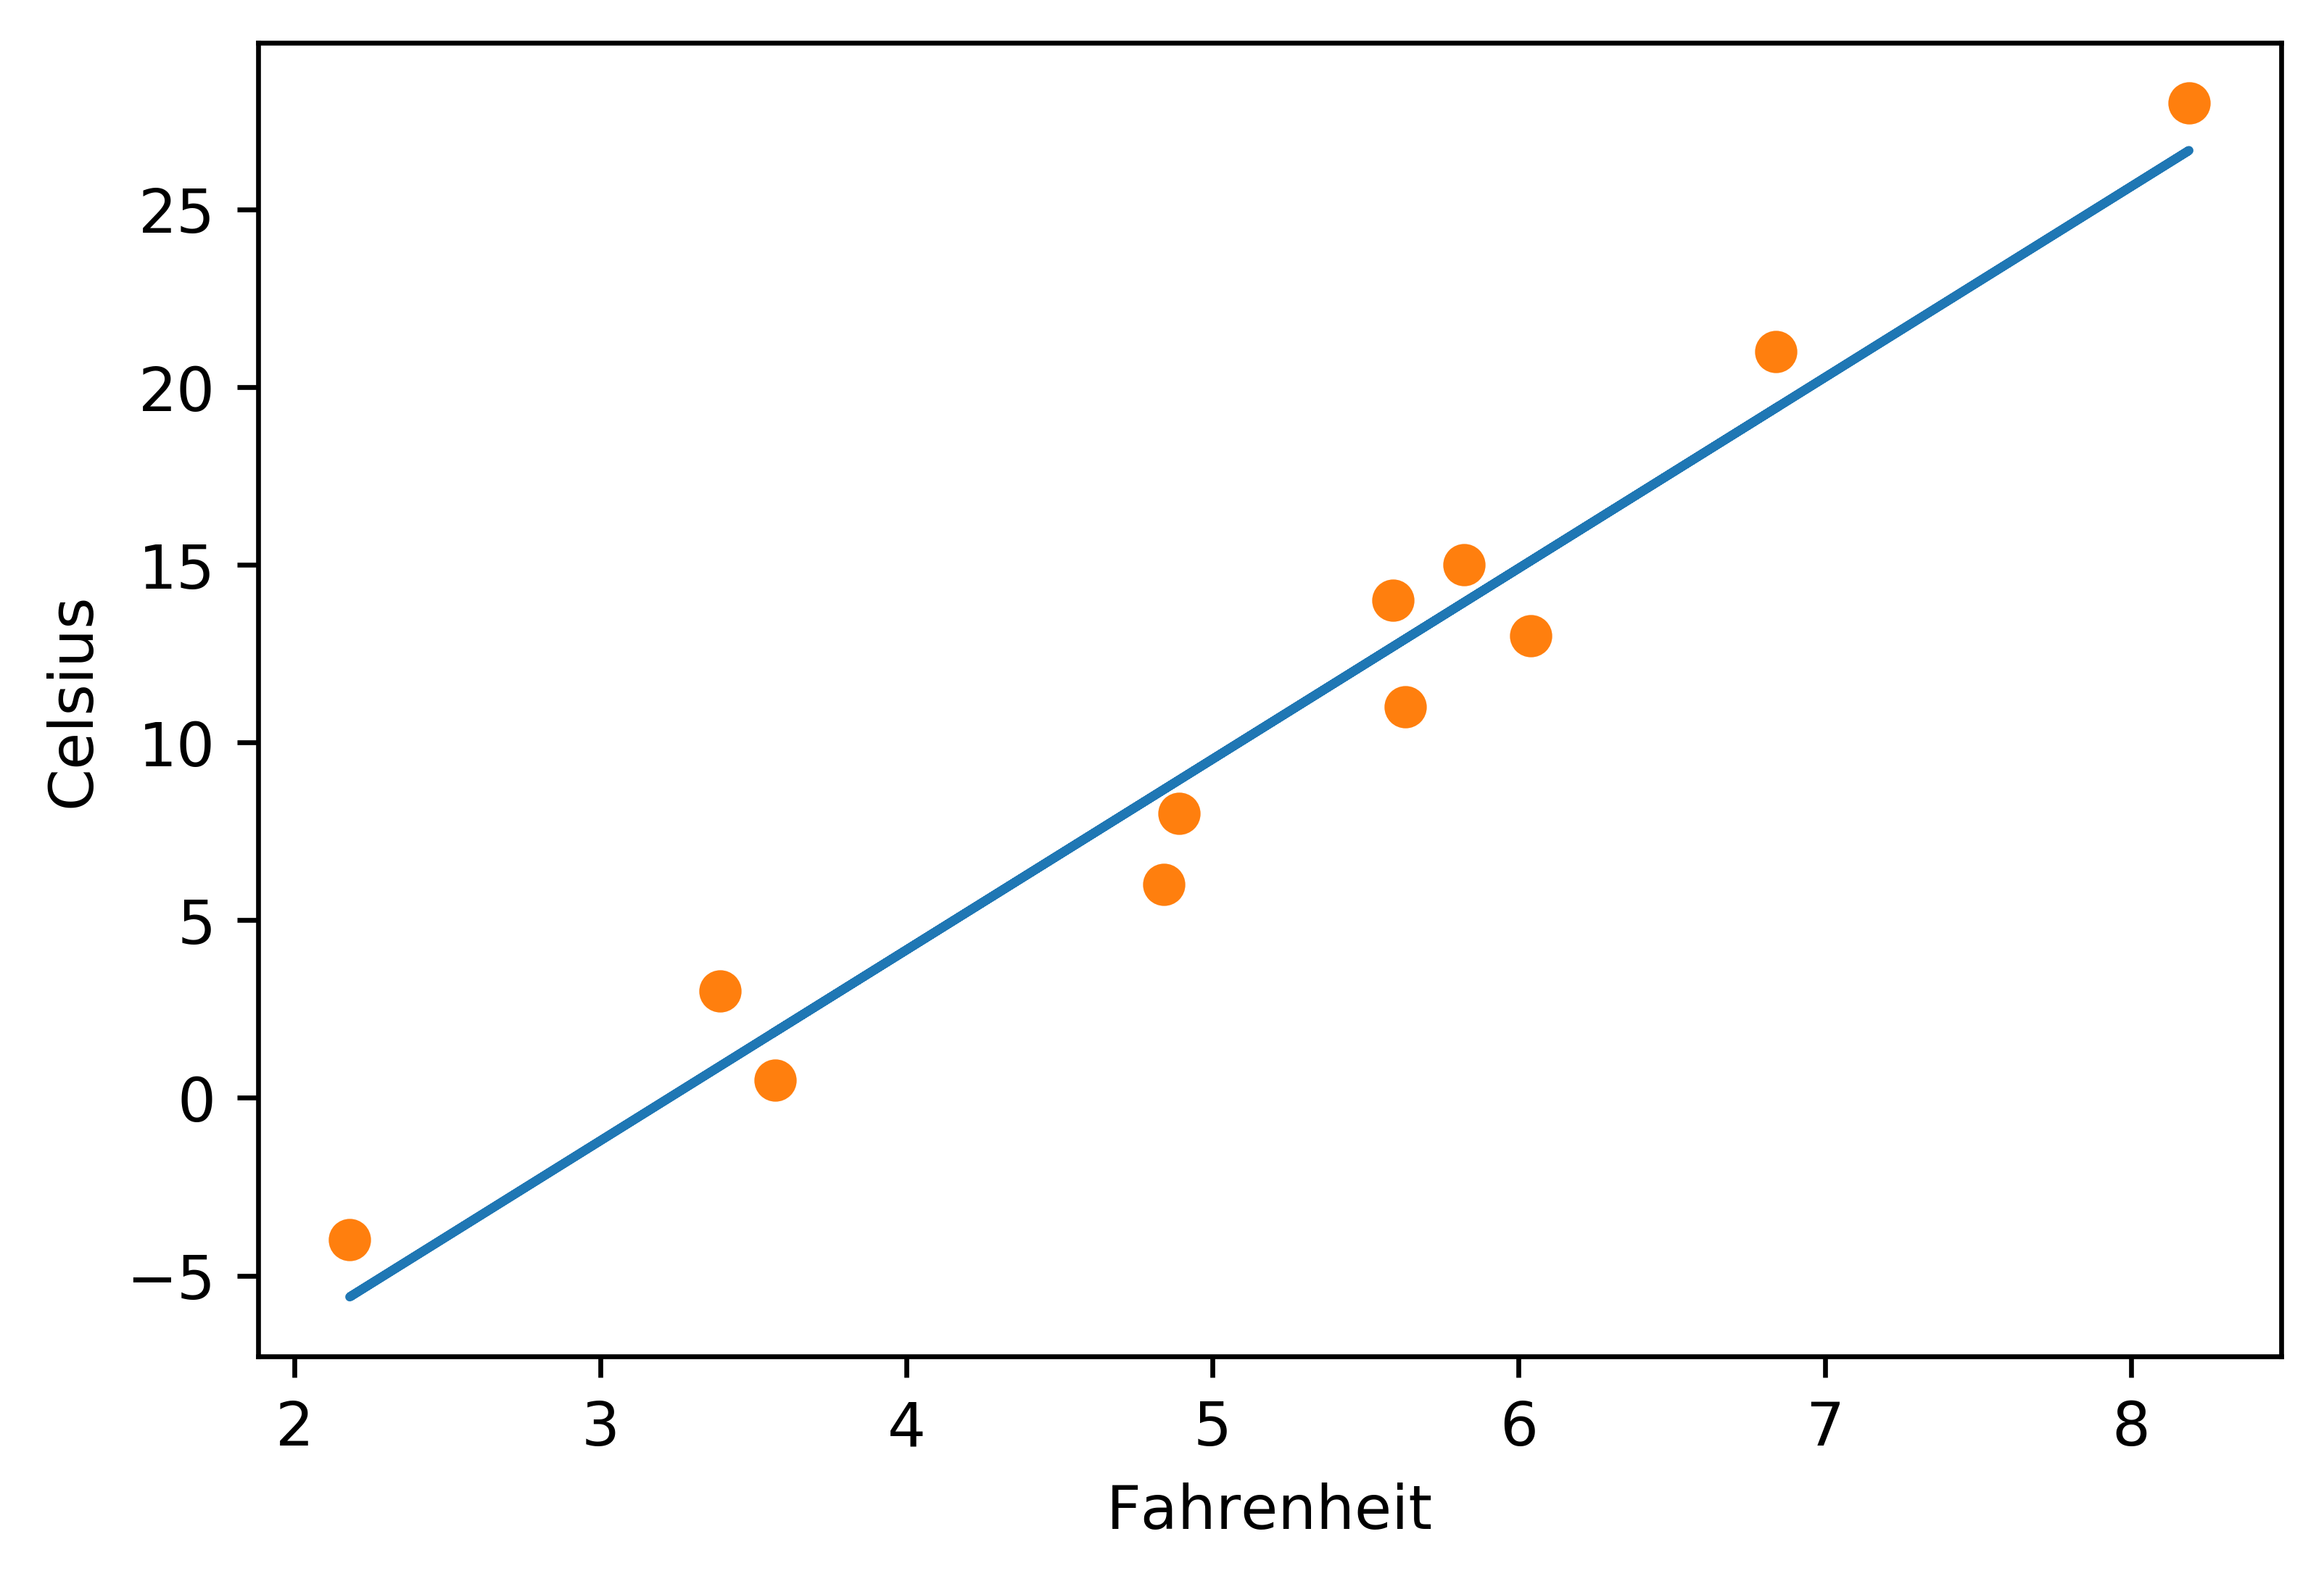

In [198]:

from matplotlib import pyplot as plt

t_p = model(t_un, *params)


fig = plt.figure(dpi=600)
plt.xlabel("Unknown")
plt.ylabel("Celsius")
plt.plot(t_un.numpy(), t_p.detach().numpy())
plt.plot(t_un.numpy(), t_celsius.numpy(), 'o')

In [336]:
def training_loop(n_epochs, learning_rate, params, t_unknown, t_celsius):
    for epoch in range(1, n_epochs + 1):
        if params.grad is not None:
            params.grad.zero_()

        t_predicted = model(t_unknown, *params)
        loss = loss_fn(t_predicted, t_celsius)
        loss.backward()

        with torch.no_grad():
            params -= learning_rate * params.grad

        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))

    return params

# Now with autograd

In [337]:
t_un = 0.1 * t_unknown
params = training_loop(
    n_epochs = 5000,
    learning_rate = 1e-2,
    params = torch.tensor([1.0, 0.0], requires_grad=True), #the important line
    t_unknown = t_un,
    t_celsius = t_celsius)

Epoch 500, Loss 7.860116
Epoch 1000, Loss 3.828538
Epoch 1500, Loss 3.092191
Epoch 2000, Loss 2.957697
Epoch 2500, Loss 2.933134
Epoch 3000, Loss 2.928648
Epoch 3500, Loss 2.927830
Epoch 4000, Loss 2.927679
Epoch 4500, Loss 2.927652
Epoch 5000, Loss 2.927647


In [338]:
# Used trained model for estimation
# Test set conversation unknown to celsius
p = model(torch.tensor([2.2]), *params)
print(p)

tensor([-5.4936], grad_fn=<AddBackward0>)


# SGD

In [339]:
def training_loop(n_epochs, params, t_unknown, t_celsius, optimizer):
    for epoch in range(1, n_epochs + 1):
        t_predicted = model(t_unknown, *params)
        loss = loss_fn(t_predicted, t_celsius)
        
        optimizer.zero_grad()
        
        loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))

    return params

In [340]:
t_un = 0.1 * t_unknown
learning_rate = 1e-2
params = torch.tensor([1.0, 0.0], requires_grad=True)
optimizer = optim.SGD([params], lr = learning_rate)

params = training_loop(
    n_epochs = 5000,
    params = params,
    t_unknown = t_un,
    t_celsius = t_celsius,
    optimizer = optimizer)
print(params)


Epoch 500, Loss 7.860118
Epoch 1000, Loss 3.828538
Epoch 1500, Loss 3.092191
Epoch 2000, Loss 2.957697
Epoch 2500, Loss 2.933134
Epoch 3000, Loss 2.928648
Epoch 3500, Loss 2.927830
Epoch 4000, Loss 2.927680
Epoch 4500, Loss 2.927651
Epoch 5000, Loss 2.927648
tensor([  5.3671, -17.3012], requires_grad=True)


In [341]:
# To test always devide by 10 as we divided the input by it
# 3 fahrneheit is -16celsius
print( model(torch.tensor([0.3]), *params))
# 40 fahrneheit is 4.4celsius
print( model(torch.tensor([4]), *params))

tensor([-15.6911], grad_fn=<AddBackward0>)
tensor([4.1671], grad_fn=<AddBackward0>)


# Adam

In [344]:
# learning_rate = 1e-1
# params = torch.tensor([1.0, 0.0], requires_grad=True)
# optimizer = optim.Adam([params], lr = learning_rate)

# params = training_loop(
#     n_epochs = 5000,
#     params = params,
#     t_unknown = t_unknown,
#     t_celsius = t_celsius,
#     optimizer = optimizer)
# print(params)

print(model(torch.tensor([17]), *params))

tensor([-8.1796], grad_fn=<AddBackward0>)


# AdamW

In [312]:
learning_rate = 1e-1
params = torch.tensor([1.0, 0.0], requires_grad=True)
optimizer = optim.AdamW([params], lr = learning_rate)

params = training_loop(
    n_epochs = 5000,
    params = params,
    t_unknown = t_unknown,
    t_celsius = t_celsius,
    optimizer = optimizer)
print(params)# Adam

Epoch 500, Loss 9.912781
Epoch 1000, Loss 4.654775
Epoch 1500, Loss 3.669037
Epoch 2000, Loss 3.338544
Epoch 2500, Loss 3.170853
Epoch 3000, Loss 3.074995
Epoch 3500, Loss 3.017874
Epoch 4000, Loss 2.983173
Epoch 4500, Loss 2.961891
Epoch 5000, Loss 2.948784
tensor([  0.5281, -16.8138], requires_grad=True)


# Shuffle the inputs and create validation set

In [358]:
n_samples = t_unknown.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

print(train_indices, val_indices)


train_t_u = t_unknown[train_indices]
train_t_c = t_celsius[train_indices]

val_t_u = t_unknown[val_indices]
val_t_c = t_celsius[val_indices]

train_t_un = 0.1 * train_t_u
val_t_un = 0.1 * val_t_u

tensor([10,  5,  7,  4,  9,  0,  6,  2,  3]) tensor([1, 8])


In [359]:
def training_loop(n_epochs, optimizer, params, train_t_u, val_t_u, train_t_c, val_t_c):
    for epoch in range(1, n_epochs + 1):
        train_t_p = model(train_t_u, *params)
        train_loss = loss_fn(train_t_p, train_t_c)

#         Don't use autograd in validation, as it unecessarly uses resources
        with torch.no_grad():
            val_t_p = model(val_t_u, *params)
            val_loss = loss_fn(val_t_p, val_t_c)
            assert val_loss.requires_grad == False


        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        if epoch <= 3 or epoch % 500 == 0:
            print('Epoch {}, Training loss {}, Validation loss {}'.format(
                epoch, float(train_loss), float(val_loss)))

    return params

In [369]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-1
optimizer = optim.AdamW([params], lr=learning_rate)

training_loop(
    n_epochs = 3000,
    optimizer = optimizer,
    params = params,
    train_t_u = train_t_un,
    val_t_u = val_t_un,
    train_t_c = train_t_c,
    val_t_c = val_t_c)

TypeError: qmodel() missing 1 required positional argument: 'b'

# Use a quadratic model
Using a quadratic model decreases both the training loss and validation loss.

In [370]:
def qmodel(t_u,w2,w1,b):
    return w2 * t_u ** 2 + w1 * t_u + b

def training_loop(n_epochs, optimizer, params, train_t_u, val_t_u, train_t_c, val_t_c):
    for epoch in range(1, n_epochs + 1):
        train_t_p = qmodel(train_t_u, *params)
        train_loss = loss_fn(train_t_p, train_t_c)

#         Don't use autograd in validation, as it unecessarly uses resources
        with torch.no_grad():
            val_t_p = qmodel(val_t_u, *params)
            val_loss = loss_fn(val_t_p, val_t_c)
            assert val_loss.requires_grad == False


        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        if epoch <= 3 or epoch % 500 == 0:
            print('Epoch {}, Training loss {}, Validation loss {}'.format(
                epoch, float(train_loss), float(val_loss)))

    return params

params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 1e-1
optimizer = optim.Adam([params], lr=learning_rate)

training_loop(
    n_epochs = 3000,
    optimizer = optimizer,
    params = params,
    train_t_u = train_t_un,
    val_t_u = val_t_un,
    train_t_c = train_t_c,
    val_t_c = val_t_c)

print(params)

print(qmodel(torch.tensor([17]), *params))

Epoch 1, Training loss 712.9334716796875, Validation loss 508.66802978515625
Epoch 2, Training loss 510.9617919921875, Validation loss 368.5323181152344
Epoch 3, Training loss 344.2352294921875, Validation loss 252.1155242919922
Epoch 500, Training loss 2.398827075958252, Validation loss 4.498789310455322
Epoch 1000, Training loss 2.078261137008667, Validation loss 4.267244338989258
Epoch 1500, Training loss 1.8471055030822754, Validation loss 4.091010093688965
Epoch 2000, Training loss 1.7343549728393555, Validation loss 3.9950270652770996
Epoch 2500, Training loss 1.697533130645752, Validation loss 3.9555325508117676
Epoch 3000, Training loss 1.6899915933609009, Validation loss 3.942467212677002
tensor([  0.2887,   2.3613, -10.2219], requires_grad=True)
tensor([113.3428], grad_fn=<AddBackward0>)
